# Modelagem e simulação

Roberto M. Cesar Jr. - IME - USP

rmcesar@usp.br

## Caso 1D

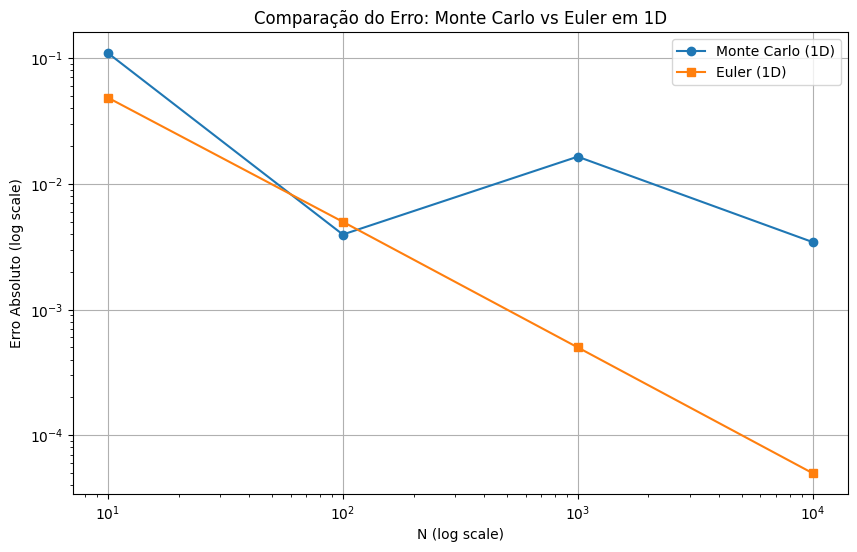

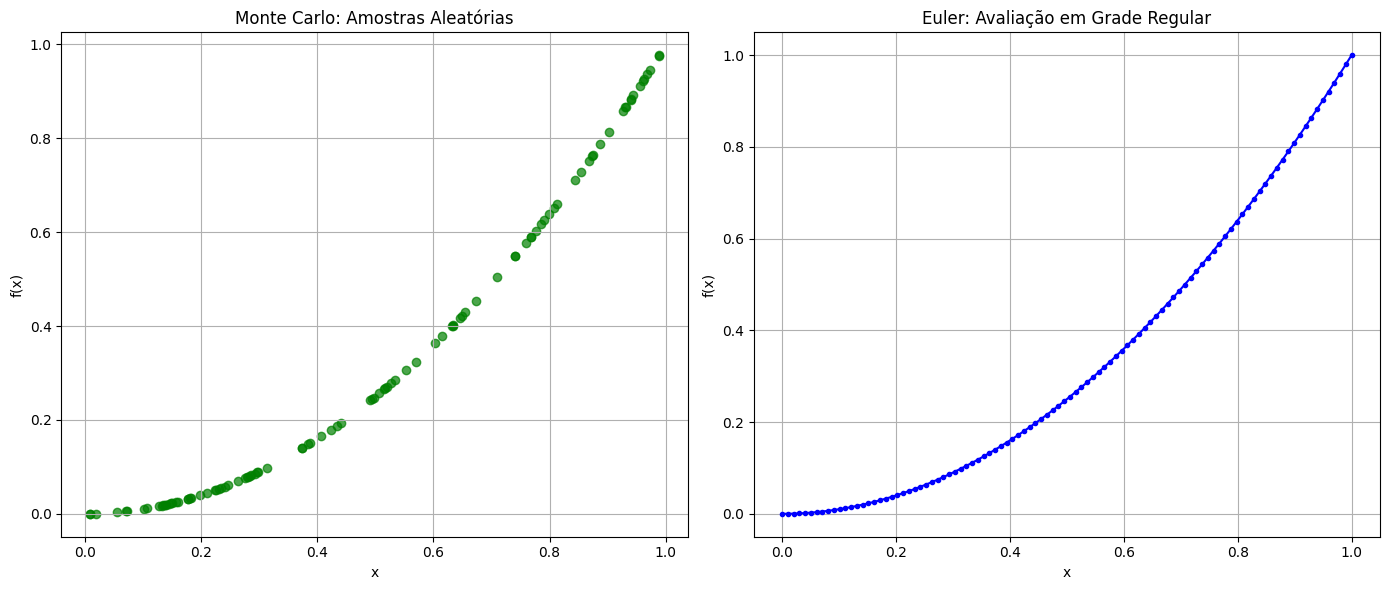

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos a função f(x) = x^2
def f(x):
    return x**2

# Método de Euler para 1D
def euler_1d(N):
    h = 1.0 / N
    y = 0.0
    x = 0.0
    for _ in range(N):
        y += h * f(x)
        x += h
    return y

# Método de Monte Carlo para 1D
def monte_carlo_1d(N):
    x_samples = np.random.uniform(0, 1, N)
    integral_estimate = np.mean(f(x_samples))
    return integral_estimate

# Valor exato da integral
integral_exact = 1/3

# Comparação para vários valores de N
N_values = [10, 100, 1000, 10000]
errors_monte_carlo = []
errors_euler = []

for N in N_values:
    mc_estimate = monte_carlo_1d(N)
    euler_estimate = euler_1d(N)
    errors_monte_carlo.append(abs(mc_estimate - integral_exact))
    errors_euler.append(abs(euler_estimate - integral_exact))

# Plotando os erros
plt.figure(figsize=(10,6))
plt.plot(N_values, errors_monte_carlo, marker='o', label='Monte Carlo (1D)')
plt.plot(N_values, errors_euler, marker='s', label='Euler (1D)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Erro Absoluto (log scale)')
plt.title('Comparação do Erro: Monte Carlo vs Euler em 1D')
plt.legend()
plt.grid(True)
plt.show()

# Visualização das amostragens
N_plot = 100

# Monte Carlo: pontos aleatórios
x_mc = np.random.uniform(0, 1, N_plot)
y_mc = f(x_mc)

# Euler: grade regular
x_euler = np.linspace(0, 1, N_plot)
y_euler = f(x_euler)

# Plotando as amostragens
plt.figure(figsize=(14,6))

# Monte Carlo
plt.subplot(1, 2, 1)
plt.scatter(x_mc, y_mc, color='green', alpha=0.7)
plt.title('Monte Carlo: Amostras Aleatórias')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# Euler
plt.subplot(1, 2, 2)
plt.plot(x_euler, y_euler, 'b.-')
plt.title('Euler: Avaliação em Grade Regular')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


## Caso 2D

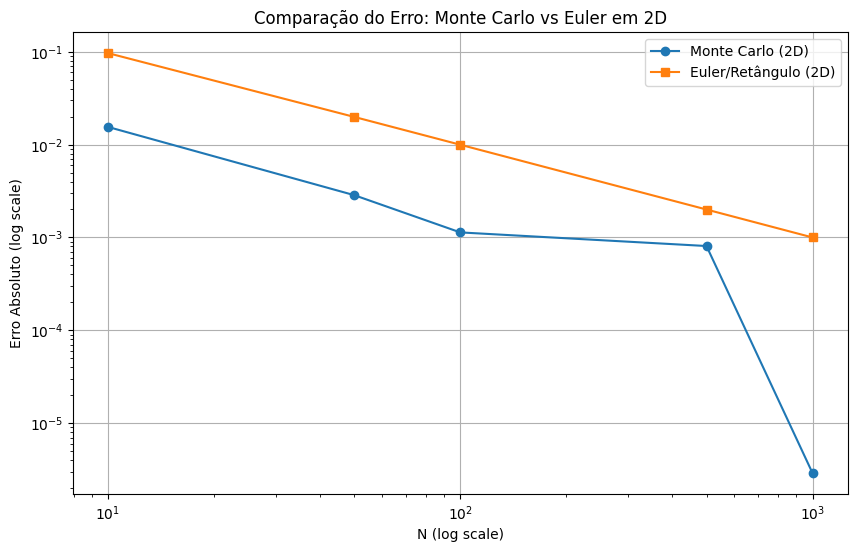

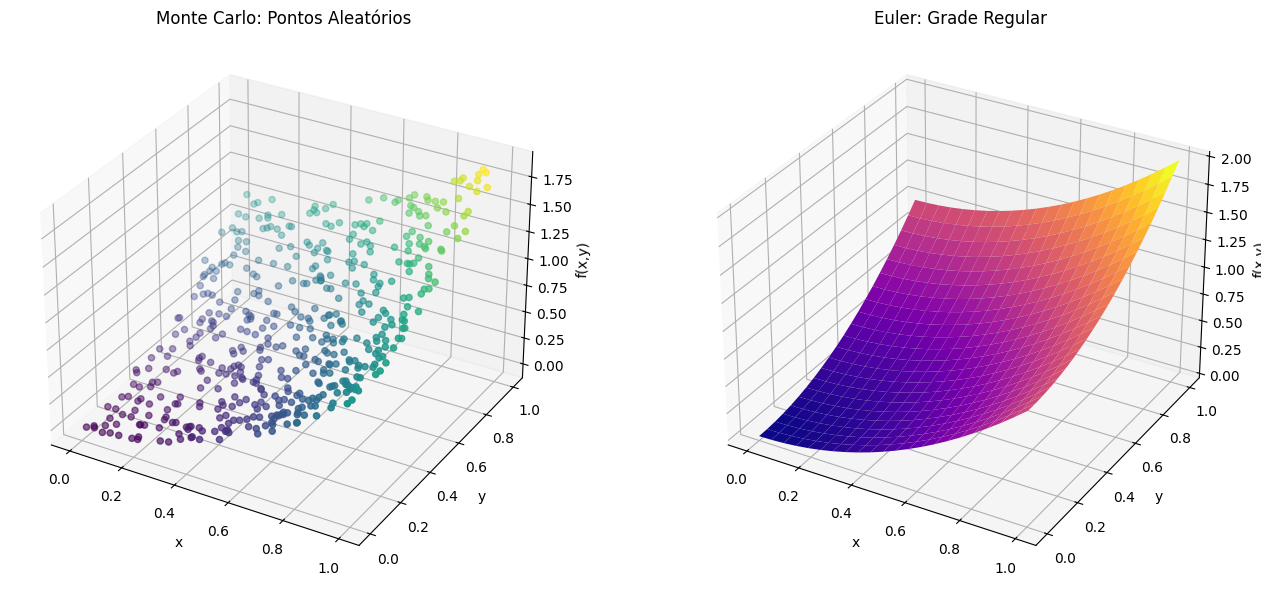

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos a função a ser integrada
def f(x, y):
    return x**2 + y**2

# Método de Monte Carlo para 2D
def monte_carlo_2d(N):
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)
    z = f(x, y)
    integral_estimate = np.mean(z)
    return integral_estimate

# Método de Euler adaptado (regra do retângulo) para 2D
def euler_2d(N):
    h = 1.0 / N
    integral_estimate = 0.0
    for i in range(N):
        for j in range(N):
            x = i * h
            y = j * h
            integral_estimate += f(x, y)
    integral_estimate *= h**2
    return integral_estimate

# Valor exato da integral
# Integral de (x^2 + y^2) sobre [0,1]x[0,1] é:
# ∫₀¹∫₀¹ (x² + y²) dy dx = (∫₀¹ x² dx) * (1) + (1) * (∫₀¹ y² dy) = 2*(1/3) = 2/3
integral_exact = 2 / 3

# Comparação para vários valores de N
N_values = [10, 50, 100, 500, 1000]
errors_monte_carlo = []
errors_euler = []

for N in N_values:
    mc_estimate = monte_carlo_2d(N*N)  # Monte Carlo usa N^2 pontos para ser comparável
    euler_estimate = euler_2d(N)
    errors_monte_carlo.append(abs(mc_estimate - integral_exact))
    errors_euler.append(abs(euler_estimate - integral_exact))

# Plotando os erros
plt.figure(figsize=(10,6))
plt.plot(N_values, errors_monte_carlo, marker='o', label='Monte Carlo (2D)')
plt.plot(N_values, errors_euler, marker='s', label='Euler/Retângulo (2D)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (log scale)')
plt.ylabel('Erro Absoluto (log scale)')
plt.title('Comparação do Erro: Monte Carlo vs Euler em 2D')
plt.legend()
plt.grid(True)
plt.show()

# Visualização das superfícies geradas

# Monte Carlo: pontos aleatórios
N_plot = 500
x_mc = np.random.uniform(0, 1, N_plot)
y_mc = np.random.uniform(0, 1, N_plot)
z_mc = f(x_mc, y_mc)

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_mc, y_mc, z_mc, c=z_mc, cmap='viridis')
ax.set_title('Monte Carlo: Pontos Aleatórios')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

# Euler: grade regular
x_euler = np.linspace(0, 1, int(np.sqrt(N_plot)))
y_euler = np.linspace(0, 1, int(np.sqrt(N_plot)))
X, Y = np.meshgrid(x_euler, y_euler)
Z = f(X, Y)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, Z, cmap='plasma', edgecolor='none')
ax2.set_title('Euler: Grade Regular')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')

plt.tight_layout()
plt.show()
